# <center>Probablity Suffix Tree</center>

## Introduction

In computer science, a suffix tree (also called PAT tree or, in an earlier form, position tree) is a compressed tree containing all the suffixes of the given text as their keys and positions in the text as their values. Suffix trees allow particularly fast implementations of many important string operations.

Probabilistic suffix tree (PST) is one of widely used sequence indexing technique which serves a model for prediction.

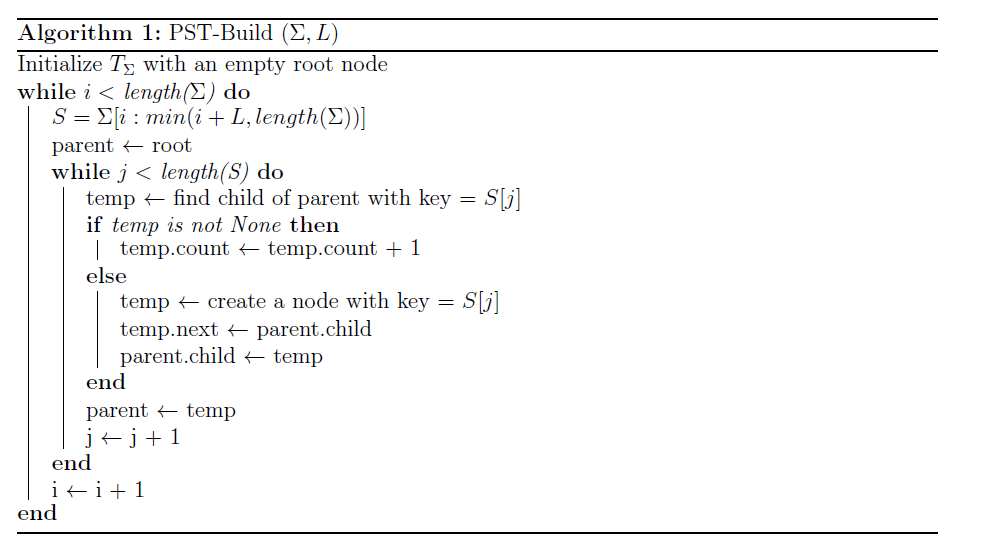

In [1]:
from IPython.display import Image
Image("pst_algo.png")

In [2]:
### For Mac/Linux OS uncomment the following line ####
#!conda install -c anaconda python-graphviz

In [3]:
### For Windows OS uncomment the following line ####
# !pip install pydotplus
# !pip install graphviz

In [4]:
### For Windows OS uncomment the following line ####
# import os
# os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

## Demo: Building a PST from scratch

### Defintion of Node Class and Associated Functions
Each node consists of
- Data/key
- Count of the occurrences of the data/key
- Pointer to the first child
- Pointer to an adjacent sibling

In [1]:
class Node:
    
    def __init__(self,key = None):
        self.data = key    
        self.count = 1
        self.child = None
        self.next = None
        
    def incrementCount(self):
        self.count += 1
        
    def setChild(self,child):
        self.child = child
        
    def setNext(self,sibling):
        self.next = sibling
        
    def getData(self):
        return self.data
    
    def getCount(self):
        return self.count
    
    def getChild(self):
        return self.child
    
    def getNext(self):
        return self.next

In [2]:
import pydotplus
from IPython.display import Image,display,clear_output

##### Defintion of Probabilistic Suffix Tree Class and Associated Functions
It is a generic tree with an empty root node.

To keep the number of pointers in a node constant
- All the children of a particular parent are in a linked list
- The parent points only to the first node (head) of the linked list
- A new child is added at the beginning of the linked list

In [3]:
import time

class PST:
    
    def __init__(self):
        self.root = Node()
        
    def find(self,current,key):
        while(current != None):
            if current.getData() == key:
                return current
            else:
                current = current.getNext()
        return current
    
    def fit(self,data,size):
        start = time.time()
        if (type(data) != list and type(data) != str):
            print('Could not fit the data.')
            print('Data should be string type or 1-d list.')
            if (type(size) != int):
                print('Buffer size should be an integer.')
        
        elif (type(size) != int):
            print('Could not fit the data.')
            print('Buffer size should be an integer.')
        
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    current = parent.getChild()
                    temp = self.find(current,S[j])
                    if temp != None:
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
                    
            print("Fit complete in %0.4f s"%(time.time() - start))
            
    def show(self):
        f = open("PST.dot",'w')
        f.write("graph PST {\n")
        f.write("node0" + "[label = Root];\n")
        temp = [self.root]
        index = [0]
        j = 1
        while(len(temp)):
            parent = temp.pop(0)
            i = index.pop(0)
            current = parent.getChild()
            while (current != None):
                f.write("node"+ str(j) + "[label = " + str(current.getData()) + "];\n")
                f.write("\"node" + str(i) + "\" -- " + "\"node" + str(j) +
                       "\"[label = " + str(current.getCount()) + "]" + ";\n")
                temp.append(current)
                #print(current.getData())
                current = current.getNext()
                index.append(j)
                j += 1
        f.write("}")
        f.close()
        graph = pydotplus.graph_from_dot_file("PST.dot")
        graph.set_size('"10,10!"')
        clear_output()
        display(Image(graph.create_png()))
        graph.write_png("PST.png")

In [6]:
pst = PST()
pst.fit("AABABDDAACABA",4)  #toy data

Fit complete in 0.0001 s


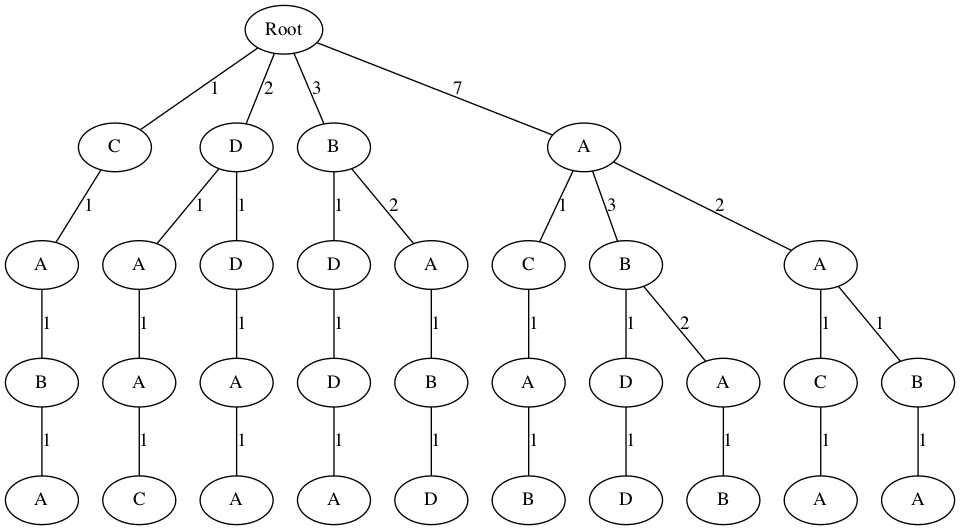

In [7]:
pst.show()